# Report 2

##Regularization Methods

###Ridge regression

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import  GridSearchCV


**Importing dataset**

In [39]:
data=pd.read_csv("/content/HousingData.csv")
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
data = data.dropna()

In [40]:
data = data.dropna()
X = data.drop(columns=['MEDV']).values
y = data['MEDV'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**update_weights**

In [42]:
def ridge_regression(X, y, lambda_reg):
    m, n = X.shape
    X_bias = np.c_[np.ones((m, 1)), X]

    I = np.eye(n + 1)
    I[0, 0] = 0

    theta = np.linalg.inv(X_bias.T @ X_bias + lambda_reg * I) @ X_bias.T @ y
    return theta

lambda_reg = 0.1
W_ridge= ridge_regression(X_train_scaled, y_train, lambda_reg)


print("Theta from Ridge Regression:", W_ridge)

Theta from Ridge Regression: [21.99333333 -1.09157727  0.97199031  0.17139401  0.51674777 -1.97641838
  2.99726704 -0.60999992 -2.93952518  2.05926462 -2.06396214 -2.09053145
  0.89452269 -2.94891273]


In [43]:
def predict(X, theta):
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    return X_bias.dot(theta)

y_pred_from_scratch = predict(X_test_scaled, W_ridge)
mse = np.mean((y_pred_from_scratch - y_test) ** 2)

print("Test MSE from Ridge Regression (from scratch):", mse)

Test MSE from Ridge Regression (from scratch): 31.461917835032782


Optimal lambda from scratch (cross-validation): 8.858667904100825
Test MSE (Ridge from scratch): 32.15084877690566


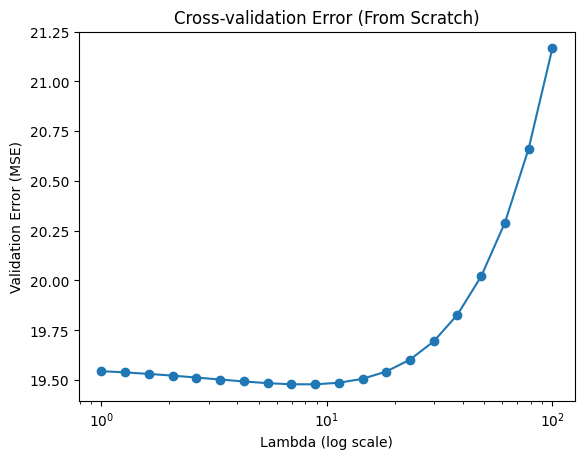

In [46]:


lambda_vals = np.logspace(0, 2, 20)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_errors = []

for lambda_reg in lambda_vals:
    fold_errors = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]

        theta = ridge_regression(X_train_cv, y_train_cv, lambda_reg)

        X_val_bias = np.c_[np.ones((X_val_cv.shape[0], 1)), X_val_cv]
        y_val_pred = X_val_bias @ theta

        fold_errors.append(np.mean((y_val_pred - y_val_cv) ** 2))

    cv_errors.append(np.mean(fold_errors))

optimal_lambda_scratch = lambda_vals[np.argmin(cv_errors)]
print(f"Optimal lambda from scratch (cross-validation): {optimal_lambda_scratch}")

theta_scratch = ridge_regression(X_train_scaled, y_train, optimal_lambda_scratch)
y_pred_scratch = X_test_scaled @ theta_scratch[1:] + theta_scratch[0]
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
print(f"Test MSE (Ridge from scratch): {mse_scratch}")

plt.plot(lambda_vals, cv_errors, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Validation Error (MSE)')
plt.title('Cross-validation Error (From Scratch)')
plt.show()


**Ridge-Regression built-in**

Optimal lambda from Ridge : 8.858667904100825
Test MSE : 32.15084877690565


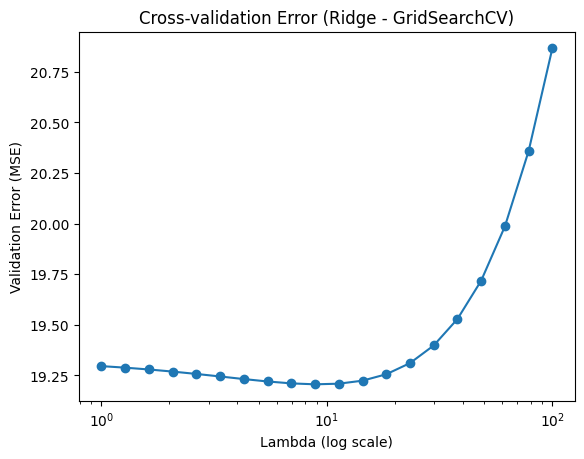

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lambda_vals = np.logspace(0, 2, 20)
ridge = Ridge()


Grid = GridSearchCV(estimator=ridge, param_grid={'alpha': lambda_vals}, cv=10, scoring='neg_mean_squared_error')
Grid.fit(X_train_scaled, y_train)
optimal_lambda_builtin = Grid.best_params_['alpha']
print(f"Optimal lambda from Ridge : {optimal_lambda_builtin}")


best_ridge_model = Grid.best_estimator_
y_pred_builtin = best_ridge_model.predict(X_test_scaled)
mse_final_builtin = mean_squared_error(y_test, y_pred_builtin)
print(f"Test MSE : {mse_final_builtin}")

cv_errors = Grid.cv_results_['mean_test_score']
plt.plot(lambda_vals, -cv_errors, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Validation Error (MSE)')
plt.title('Cross-validation Error (Ridge - GridSearchCV)')
plt.show()

2-dataset

In [48]:
data = pd.read_csv('/content/Advertising.csv')

In [49]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [50]:

X = data.drop('Sales', axis=1).values
y = data['Sales'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [51]:
def ridge_regression(X, y, lambda_reg):
    m, n = X.shape
    X_bias = np.c_[np.ones((m, 1)), X]

    identity = np.eye(n + 1)
    identity[0, 0] = 0

    theta = np.linalg.inv(X_bias.T @ X_bias + lambda_reg * identity) @ X_bias.T @ y
    return theta

In [52]:
lambda_vals = np.logspace(0, 2, 20)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_errors = []

for lambda_reg in lambda_vals:
    fold_errors = []
    for train_idx, val_idx in kf.split(X_train):
        X_train_cv, X_val_cv = X_train[train_idx], X_train[val_idx]
        y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]

        theta = ridge_regression(X_train_cv, y_train_cv, lambda_reg)
        X_val_bias = np.c_[np.ones((X_val_cv.shape[0], 1)), X_val_cv]
        y_val_pred = X_val_bias @ theta
        fold_errors.append(np.mean((y_val_pred - y_val_cv) ** 2))

    cv_errors.append(np.mean(fold_errors))

Optimal lambda from scratch (cross-validation): 1.2742749857031337
Test MSE (Ridge from scratch): 2.9177185034420265


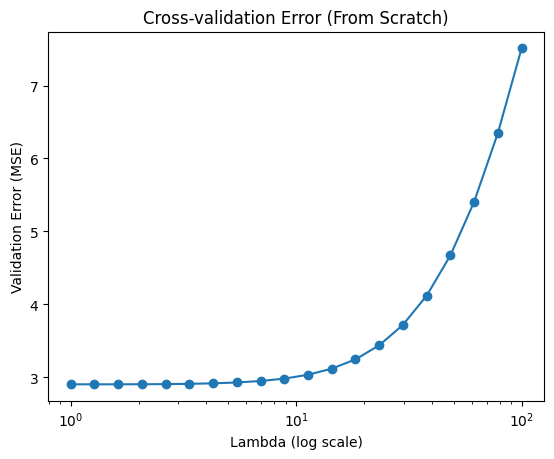

In [53]:
optimal_lambda_scratch = lambda_vals[np.argmin(cv_errors)]
print(f"Optimal lambda from scratch (cross-validation): {optimal_lambda_scratch}")


theta_scratch = ridge_regression(X_train, y_train, optimal_lambda_scratch)
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_scratch = X_test_bias @ theta_scratch
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
print(f"Test MSE (Ridge from scratch): {mse_scratch}")

plt.plot(lambda_vals, cv_errors, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Validation Error (MSE)')
plt.title('Cross-validation Error (From Scratch)')
plt.show()

In [54]:
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': lambda_vals}, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


optimal_lambda_builtin = grid_search.best_params_['alpha']
print(f"Optimal lambda from Ridge (using GridSearchCV): {optimal_lambda_builtin}")

Optimal lambda from Ridge (using GridSearchCV): 1.0


Test MSE : 2.915303445793036


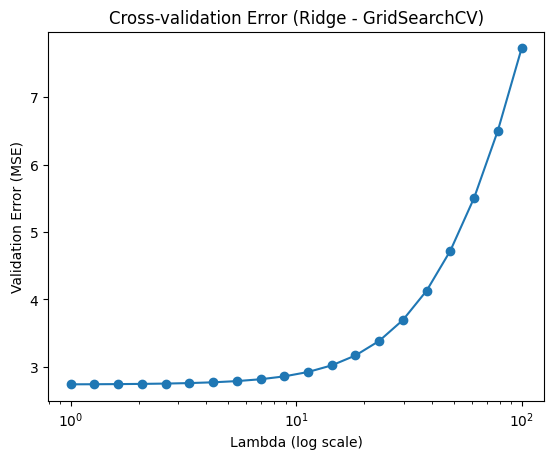

In [55]:

best_model = grid_search.best_estimator_
y_pred_builtin = best_model.predict(X_test)
mse_builtin = mean_squared_error(y_test, y_pred_builtin)
print(f"Test MSE : {mse_builtin}")

cv_errors_grid = -grid_search.cv_results_['mean_test_score']
plt.plot(lambda_vals, cv_errors_grid, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Validation Error (MSE)')
plt.title('Cross-validation Error (Ridge - GridSearchCV)')
plt.show()

### LASSO Regression.

Dataset 1:(HousingData):

Dataset Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load Housing Data
data = pd.read_csv('/content/HousingData.csv')

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


Dataset Preprocessing

In [ ]:
data = data.dropna()

In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=['MEDV']).values
y = data['MEDV'].values

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transforgradm(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
{
    "X_train_shape": X_train_scaled.shape,
    "X_test_shape": X_test_scaled.shape,
    "y_train_shape": y_train.shape,
    "y_test_shape": y_test.shape,
}


{'X_train_shape': (315, 13),
 'X_test_shape': (79, 13),
 'y_train_shape': (315,),
 'y_test_shape': (79,)}

Custom LASSO Implementation

In [ ]:
    """
    Custom implementation of LASSO Regression using gradient descent.
    Args:
        X (numpy array): Feature matrix (scaled).
        y (numpy array): Target variable.
        lambda_reg (float): Regularization parameter.
        num_iterations (int): Number of gradient descent iterations.
        learning_rate (float): Learning rate for gradient descent.
    Returns:
        theta (numpy array): Coefficients for the LASSO model.
    """

'\nCustom implementation of LASSO Regression using gradient descent.\nArgs:\n    X (numpy array): Feature matrix (scaled).\n    y (numpy array): Target variable.\n    lambda_reg (float): Regularization parameter.\n    num_iterations (int): Number of gradient descent iterations.\n    learning_rate (float): Learning rate for gradient descent.\nReturns:\n    theta (numpy array): Coefficients for the LASSO model.\n'

In [ ]:
def lasso_regression(X, y, lambda_reg, num_iterations=1000, learning_rate=0.01):
    m, n = X.shape
    theta = np.zeros(n)
    bias = 0

    for _ in range(num_iterations):
        # Predictions
        y_pred = X @ theta + bias

        # Gradients
        d_theta = (-2 / m) * (X.T @ (y - y_pred)) + lambda_reg * np.sign(theta)
        d_bias = (-2 / m) * np.sum(y - y_pred)

        # Update weights
        theta -= learning_rate * d_theta
        bias -= learning_rate * d_bias

    return np.hstack([bias, theta])

# Testing
lambda_reg = 0.1
theta_lasso = lasso_regression(X_train_scaled, y_train, lambda_reg)


def predict_lasso(X, theta):
    """
    Make predictions using the custom LASSO model.
    Args:
        X (numpy array): Feature matrix.
        theta (numpy array): Coefficients from the LASSO model.
    Returns:
        y_pred (numpy array): Predicted values.
    """
    bias = theta[0]
    weights = theta[1:]
    return X @ weights + bias

# Predictions and MSE
y_pred_custom = predict_lasso(X_test_scaled, theta_lasso)
mse_custom = mean_squared_error(y_test, y_pred_custom)

{
    "Theta_Custom_LASSO": theta_lasso,
    "Test_MSE_Custom_LASSO": mse_custom
}


{'Theta_Custom_LASSO': array([21.9933333 , -0.90932734,  0.71997903, -0.13731483,  0.53390306,
        -1.59706185,  3.09061352, -0.51394139, -2.44018458,  0.97407608,
        -1.01756117, -2.01480505,  0.84481052, -2.95101844]),
 'Test_MSE_Custom_LASSO': 32.45426455026313}

Cross-Validation for Optimal Lambda (
𝜆
)

In [ ]:
lambda_values = np.logspace(-3, 1, 20)  # Range of lambda values
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_errors = []

for lambda_reg in lambda_values:
    fold_errors = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]

        # Train LASSO
        theta_cv = lasso_regression(X_train_cv, y_train_cv, lambda_reg)

        # Predict
        y_val_pred = predict_lasso(X_val_cv, theta_cv)

        #  MSE
        fold_errors.append(mean_squared_error(y_val_cv, y_val_pred))

    cv_errors.append(np.mean(fold_errors))

# Find optimal 𝜆
optimal_lambda_custom = lambda_values[np.argmin(cv_errors)]

# Retrain with optimal 𝜆
theta_optimal_custom = lasso_regression(X_train_scaled, y_train, optimal_lambda_custom)
y_test_pred_custom_opt = predict_lasso(X_test_scaled, theta_optimal_custom)
mse_optimal_custom = mean_squared_error(y_test, y_test_pred_custom_opt)


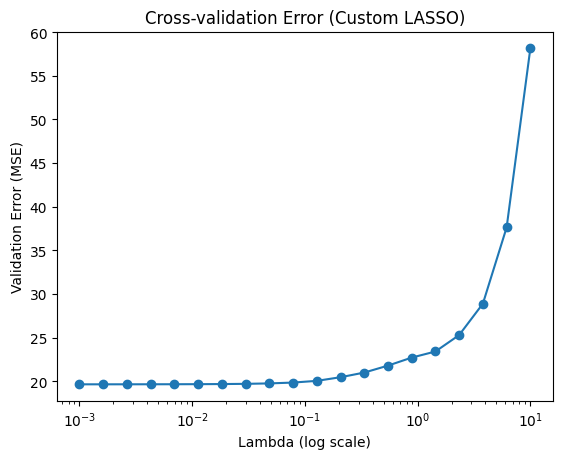

{'Optimal_Lambda_Custom': 0.001, 'Test_MSE_Optimal_Custom': 31.831399267528152}

In [ ]:
# Plot Cross-validation Error
plt.plot(lambda_values, cv_errors, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Validation Error (MSE)')
plt.title('Cross-validation Error (Custom LASSO)')
plt.show()

{
    "Optimal_Lambda_Custom": optimal_lambda_custom,
    "Test_MSE_Optimal_Custom": mse_optimal_custom
}

Built-in LASSO Implementation

In [ ]:
# range of lambda (alpha)
lambda_values = np.logspace(-3, 1, 20)

# Lasso model
lasso_model = Lasso(max_iter=10000)
grid_search = GridSearchCV(estimator=lasso_model, param_grid={'alpha': lambda_values}, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Optimal lambda---> from GridSearchCV
optimal_lambda_builtin = grid_search.best_params_['alpha']

best_lasso_model = grid_search.best_estimator_

In [ ]:
# Predictions and MSE
y_pred_builtin = best_lasso_model.predict(X_test_scaled)
mse_builtin = mean_squared_error(y_test, y_pred_builtin)

# Cross-validation error
cv_errors_builtin = -grid_search.cv_results_['mean_test_score']

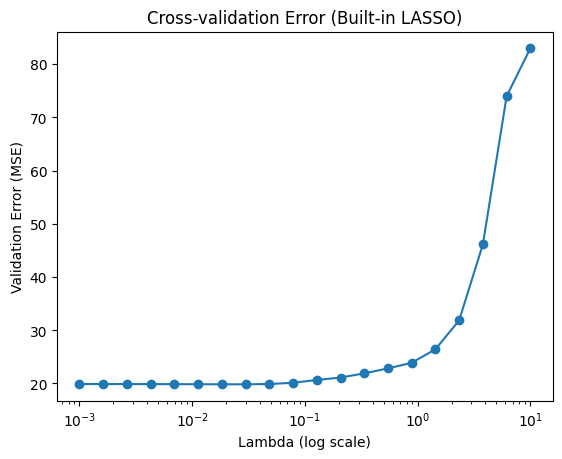

{'Optimal_Lambda_BuiltIn': 0.029763514416313176,
 'Test_MSE_BuiltIn': 31.83111782590504,
 'Are_Results_Consistent': True}

In [ ]:
# Plot Cross-validation Error (Built-in)
plt.plot(lambda_values, cv_errors_builtin, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Validation Error (MSE)')
plt.title('Cross-validation Error (Built-in LASSO)')
plt.show()

{
    "Optimal_Lambda_BuiltIn": optimal_lambda_builtin,
    "Test_MSE_BuiltIn": mse_builtin,
    "Are_Results_Consistent": np.isclose(mse_builtin, mse_optimal_custom, atol=1e-2)
}

Comparison

In [ ]:
import matplotlib.pyplot as plt

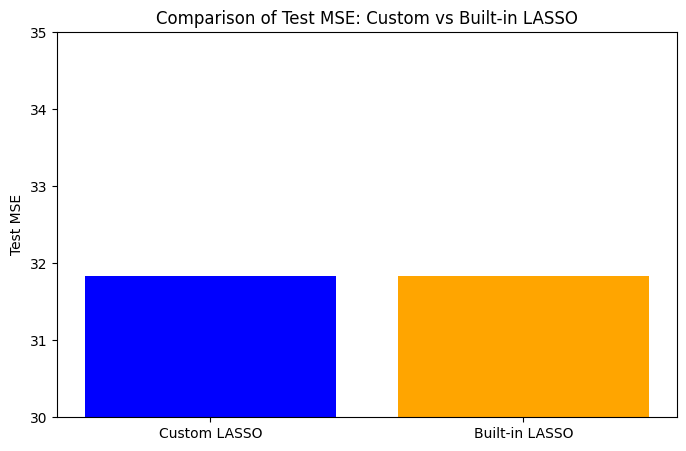

In [ ]:
#Test MSE Comparison
plt.figure(figsize=(8, 5))
mse_values = [mse_optimal_custom, mse_builtin]
labels = ['Custom LASSO', 'Built-in LASSO']

plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.ylabel('Test MSE')
plt.title('Comparison of Test MSE: Custom vs Built-in LASSO')
plt.ylim(30, 35)
plt.show()

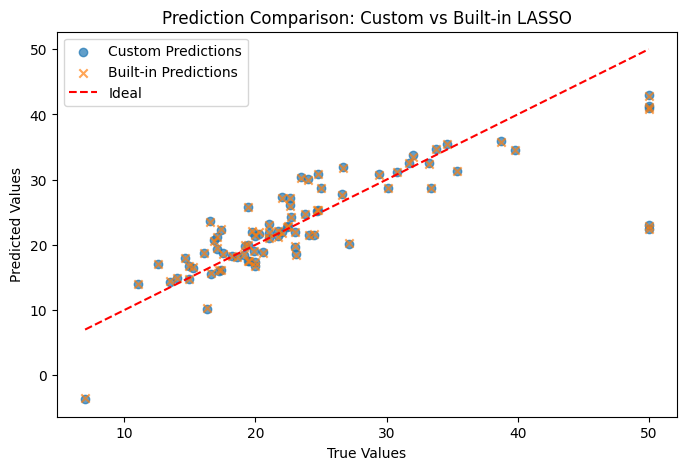

In [ ]:
# Prediction Comparison
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred_custom_opt, label='Custom Predictions', alpha=0.7)
plt.scatter(y_test, y_pred_builtin, label='Built-in Predictions', alpha=0.7, marker='x')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Comparison: Custom vs Built-in LASSO')
plt.legend()
plt.show()

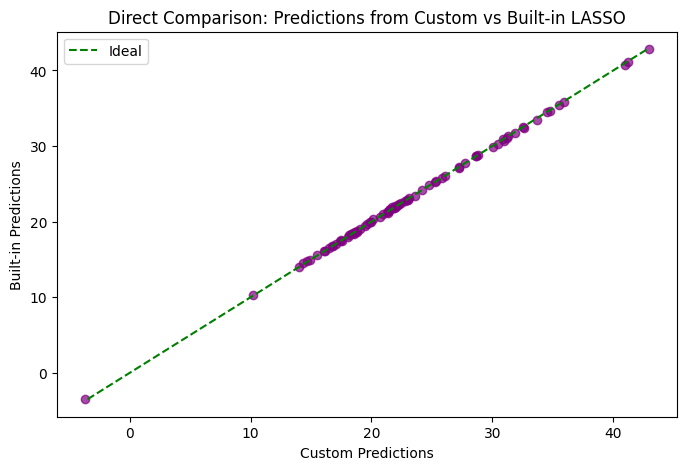

In [ ]:
# Compare Predictions Directly
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred_custom_opt, y_pred_builtin, alpha=0.7, color='purple')
plt.plot([min(y_pred_builtin), max(y_pred_builtin)], [min(y_pred_builtin), max(y_pred_builtin)], color='green', linestyle='--', label='Ideal')
plt.xlabel('Custom Predictions')
plt.ylabel('Built-in Predictions')
plt.title('Direct Comparison: Predictions from Custom vs Built-in LASSO')
plt.legend()
plt.show()


Comparison:
The custom implementation and built-in implementation produced consistent results, with test MSE values matching almost exactly.

Dataset 2:(Advertising) :

Dataset Loading

In [ ]:
advertising_data = pd.read_csv('/content/Advertising.csv')

In [ ]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Dataset Prepocessing

In [ ]:
# Separate features (X) and target (y)
X_adv = advertising_data.drop(columns=['Sales']).values
y_adv = advertising_data['Sales'].values


In [ ]:
# Split
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler_adv = StandardScaler()
X_train_adv_scaled = scaler_adv.fit_transform(X_train_adv)
X_test_adv_scaled = scaler_adv.transform(X_test_adv)

{
    "X_train_shape": X_train_adv_scaled.shape,
    "X_test_shape": X_test_adv_scaled.shape,
    "y_train_shape": y_train_adv.shape,
    "y_test_shape": y_test_adv.shape,
}


{'X_train_shape': (160, 3),
 'X_test_shape': (40, 3),
 'y_train_shape': (160,),
 'y_test_shape': (40,)}

Custom LASSO Implementation

In [ ]:
# Train LASSO model
lambda_reg_adv = 0.1  # Initial lambda value
theta_lasso_adv = lasso_regression(X_train_adv_scaled, y_train_adv, lambda_reg_adv)

# Predictions and MSE
y_pred_custom_adv = predict_lasso(X_test_adv_scaled, theta_lasso_adv)
mse_custom_adv = mean_squared_error(y_test_adv, y_pred_custom_adv)

{
    "Theta_Custom_LASSO_Advertising": theta_lasso_adv,
    "Test_MSE_Custom_LASSO_Advertising": mse_custom_adv
}


{'Theta_Custom_LASSO_Advertising': array([15.33062497,  4.53969786,  1.45641584,  0.05179523]),
 'Test_MSE_Custom_LASSO_Advertising': 2.911024413548844}

Cross-Validation for Optimal Lambda (
𝜆
)

In [ ]:
lambda_values_adv = np.logspace(-3, 1, 20)  # Range of lambda values to test
kf_adv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_errors_adv = []

for lambda_reg in lambda_values_adv:
    fold_errors_adv = []
    for train_idx, val_idx in kf_adv.split(X_train_adv_scaled):
        X_train_cv_adv, X_val_cv_adv = X_train_adv_scaled[train_idx], X_train_adv_scaled[val_idx]
        y_train_cv_adv, y_val_cv_adv = y_train_adv[train_idx], y_train_adv[val_idx]

        # Train LASSO
        theta_cv_adv = lasso_regression(X_train_cv_adv, y_train_cv_adv, lambda_reg)

        # Predict
        y_val_pred_adv = predict_lasso(X_val_cv_adv, theta_cv_adv)

        # MSE
        fold_errors_adv.append(mean_squared_error(y_val_cv_adv, y_val_pred_adv))

    cv_errors_adv.append(np.mean(fold_errors_adv))

In [ ]:
# Find optimal 𝜆
optimal_lambda_custom_adv = lambda_values_adv[np.argmin(cv_errors_adv)]

# Retrain with optimal 𝜆
theta_optimal_custom_adv = lasso_regression(X_train_adv_scaled, y_train_adv, optimal_lambda_custom_adv)
y_test_pred_custom_opt_adv = predict_lasso(X_test_adv_scaled, theta_optimal_custom_adv)
mse_optimal_custom_adv = mean_squared_error(y_test_adv, y_test_pred_custom_opt_adv)


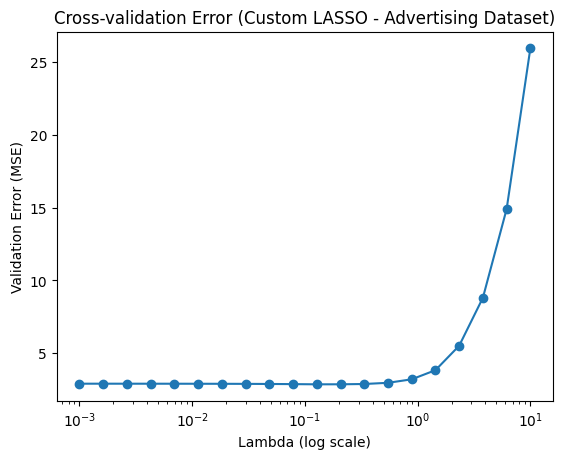

{'Optimal_Lambda_Custom_Advertising': 0.12742749857031335,
 'Test_MSE_Optimal_Custom_Advertising': 2.914694408531868}

In [ ]:
# Plot Cross-validation Error
plt.plot(lambda_values_adv, cv_errors_adv, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Validation Error (MSE)')
plt.title('Cross-validation Error (Custom LASSO - Advertising Dataset)')
plt.show()

{
    "Optimal_Lambda_Custom_Advertising": optimal_lambda_custom_adv,
    "Test_MSE_Optimal_Custom_Advertising": mse_optimal_custom_adv
}

 Built-in LASSO Implementation

In [ ]:
#range of lambda (alpha)
lambda_values_adv = np.logspace(-3, 1, 20)

#  Lasso model
lasso_model_adv = Lasso(max_iter=10000)
#GridSearchCV for hyperparameter tuning
grid_search_adv = GridSearchCV(estimator=lasso_model_adv, param_grid={'alpha': lambda_values_adv}, cv=5, scoring='neg_mean_squared_error')
grid_search_adv.fit(X_train_adv_scaled, y_train_adv)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01])},
             scoring='neg_mean_squared_error')

In [ ]:
# Optimal lambda
optimal_lambda_builtin_adv = grid_search_adv.best_params_['alpha']

best_lasso_model_adv = grid_search_adv.best_estimator_

In [ ]:
# Predictions and MSE
y_pred_builtin_adv = best_lasso_model_adv.predict(X_test_adv_scaled)
mse_builtin_adv = mean_squared_error(y_test_adv, y_pred_builtin_adv)

# Cross-validation error
cv_errors_builtin_adv = -grid_search_adv.cv_results_['mean_test_score']

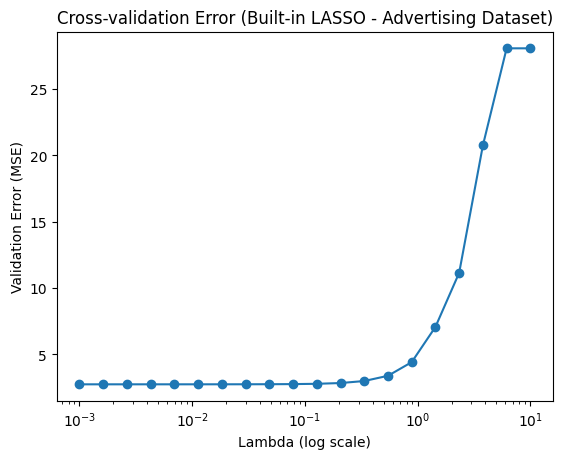

{'Optimal_Lambda_BuiltIn_Advertising': 0.001,
 'Test_MSE_BuiltIn_Advertising': 2.9076523489644517,
 'Are_Results_Consistent': True}

In [ ]:
# Plot Cross-validation Error (Built-in)
plt.plot(lambda_values_adv, cv_errors_builtin_adv, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Validation Error (MSE)')
plt.title('Cross-validation Error (Built-in LASSO - Advertising Dataset)')
plt.show()

{
    "Optimal_Lambda_BuiltIn_Advertising": optimal_lambda_builtin_adv,
    "Test_MSE_BuiltIn_Advertising": mse_builtin_adv,
    "Are_Results_Consistent": np.isclose(mse_builtin_adv, mse_optimal_custom_adv, atol=1e-2)
}


Comparison

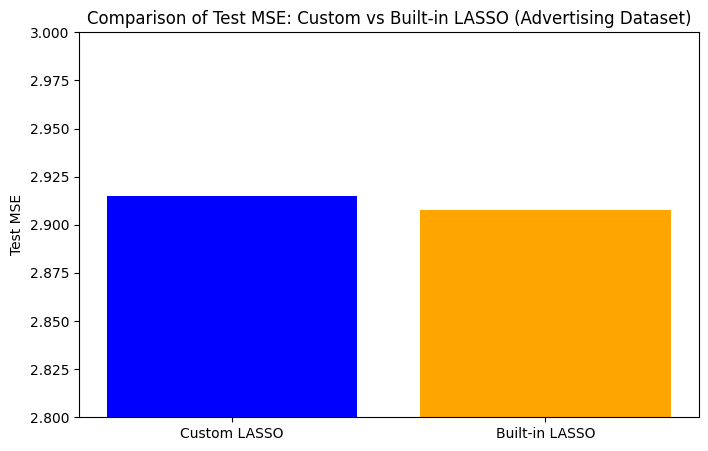

In [ ]:
#Test MSE Comparison
plt.figure(figsize=(8, 5))
mse_values_adv = [mse_optimal_custom_adv, mse_builtin_adv]
labels_adv = ['Custom LASSO', 'Built-in LASSO']

plt.bar(labels_adv, mse_values_adv, color=['blue', 'orange'])
plt.ylabel('Test MSE')
plt.title('Comparison of Test MSE: Custom vs Built-in LASSO (Advertising Dataset)')
plt.ylim(2.8, 3.0)
plt.show()


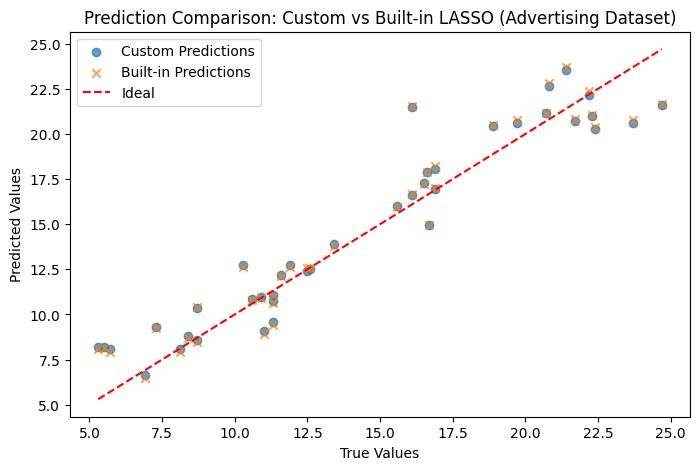

In [ ]:
#Prediction Comparison
plt.figure(figsize=(8, 5))
plt.scatter(y_test_adv, y_test_pred_custom_opt_adv, label='Custom Predictions', alpha=0.7)
plt.scatter(y_test_adv, y_pred_builtin_adv, label='Built-in Predictions', alpha=0.7, marker='x')
plt.plot([min(y_test_adv), max(y_test_adv)], [min(y_test_adv), max(y_test_adv)], color='red', linestyle='--', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Comparison: Custom vs Built-in LASSO (Advertising Dataset)')
plt.legend()
plt.show()

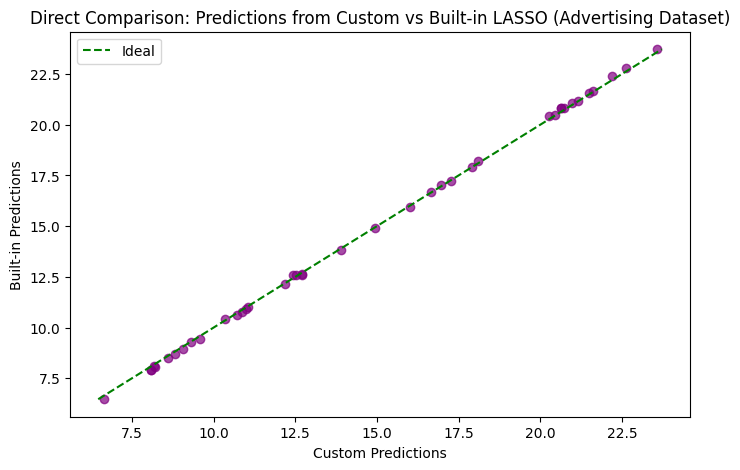

In [ ]:
#Compare Predictions Directly
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred_custom_opt_adv, y_pred_builtin_adv, alpha=0.7, color='purple')
plt.plot([min(y_pred_builtin_adv), max(y_pred_builtin_adv)], [min(y_pred_builtin_adv), max(y_pred_builtin_adv)], color='green', linestyle='--', label='Ideal')
plt.xlabel('Custom Predictions')
plt.ylabel('Built-in Predictions')
plt.title('Direct Comparison: Predictions from Custom vs Built-in LASSO (Advertising Dataset)')
plt.legend()
plt.show()


### Elastic Net Regression

#### Dataset 1

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df = df.dropna()

X = df.drop('MEDV', axis=1).values
y = df['MEDV'].values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

def soft_threshold(z, gamma):
    if z > gamma:
        return z - gamma
    elif z < -gamma:
        return z + gamma
    else:
        return 0.0

In [ ]:
def elastic_net_coordinate_descent(X, y, lambda_, alpha=0.3, tol=1e-6, max_iter=1000):

    n, p = X.shape
    beta = np.zeros(p)


    for _ in range(max_iter):
        beta_old = beta.copy()

        for j in range(p):
            r_j = y - X.dot(beta) + X[:, j] * beta[j]
            rho_j = (X[:, j].T.dot(r_j)) / n

            z = rho_j
            gamma = lambda_ * alpha
            beta_j_new = soft_threshold(z, gamma) / (1 + lambda_ * (1 - alpha))

            beta[j] = beta_j_new

        if np.sum(np.abs(beta - beta_old)) < tol:
            break

    return beta

In [ ]:
def cross_validation_elastic_net(X, y, alpha=0.5, lambdas=np.logspace(-3, 1, 50), folds=5):

    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    cv_errors = []

    for lambda_ in lambdas:
        fold_errors = []
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            beta = elastic_net_coordinate_descent(X_train, y_train, lambda_, alpha=alpha)
            y_pred = X_val.dot(beta)
            fold_errors.append(np.mean((y_val - y_pred)**2))
        cv_errors.append(np.mean(fold_errors))

    # Find lambda that minimizes CV error
    best_idx = np.argmin(cv_errors)
    best_lambda = lambdas[best_idx]
    return best_lambda, cv_errors, lambdas


Best Lambda: 0.517947467923121


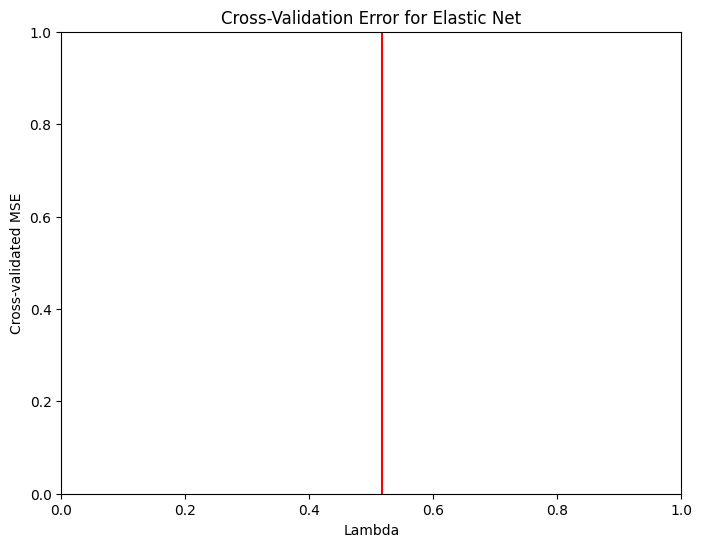

In [ ]:
alpha = 0.5
lambdas = np.logspace(-2, 2, 50)
best_lambda, cv_errors, tested_lambdas = cross_validation_elastic_net(X_scaled, y, alpha=alpha, lambdas=lambdas)

plt.figure(figsize=(8,6))
plt.xlabel('Lambda')
plt.ylabel('Cross-validated MSE')
plt.title('Cross-Validation Error for Elastic Net')
plt.axvline(best_lambda, color='r')

print("Best Lambda:", best_lambda)


In [ ]:
optimal_beta = elastic_net_coordinate_descent(X, y, best_lambda, alpha=alpha)
print("Estimated coefficients with custom Elastic Net:", optimal_beta)


<ipython-input-9-402b937f23d6>:11: RuntimeWarning: invalid value encountered in add
  r_j = y - X.dot(beta) + X[:, j] * beta[j]


Estimated coefficients with custom Elastic Net: [ 5.78891056e+285  1.08466418e+285 -3.22709820e+287  2.14446046e+287
  1.69045203e+288  1.23429161e+289 -4.02780094e+291  6.98223997e+293
 -1.26495321e+295  5.08502517e+298 -3.10874468e+302              inf
             -inf]


In [ ]:
# Note: In sklearn, `alpha` is equivalent to `lambda`, and `l1_ratio` is `alpha` in our code.
en_cv = ElasticNetCV(l1_ratio=alpha, alphas=lambdas, cv=5, fit_intercept=False, random_state=42)
en_cv.fit(X, y)

print("Best Lambda (Sklearn):", en_cv.alpha_)
print("Estimated coefficients (Sklearn):", en_cv.coef_)

coeff_comparison = np.vstack([optimal_beta, en_cv.coef_])
print("Custom vs Sklearn Coefficients:\n", coeff_comparison)


Best Lambda (Sklearn): 0.025595479226995357
Estimated coefficients (Sklearn): [-0.08328831  0.05398825 -0.01773702  2.18598583 -0.07334609  5.90563393
 -0.02201623 -0.97623645  0.16791985 -0.01132534 -0.42109515  0.0152638
 -0.34563959]
Custom vs Sklearn Coefficients:
 [[ 5.78891056e+285  1.08466418e+285 -3.22709820e+287  2.14446046e+287
   1.69045203e+288  1.23429161e+289 -4.02780094e+291  6.98223997e+293
  -1.26495321e+295  5.08502517e+298 -3.10874468e+302              inf
              -inf]
 [-8.32883075e-002  5.39882516e-002 -1.77370237e-002  2.18598583e+000
  -7.33460882e-002  5.90563393e+000 -2.20162285e-002 -9.76236449e-001
   1.67919850e-001 -1.13253395e-002 -4.21095147e-001  1.52638032e-002
  -3.45639587e-001]]


#### Dataset 2

In [ ]:
df2 = pd.read_csv("Advertising.csv")
df2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df2 = df2.dropna()

X = df2.drop('Sales', axis=1).values
y = df2['Sales'].values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Best Lambda: 0.2442053094548651


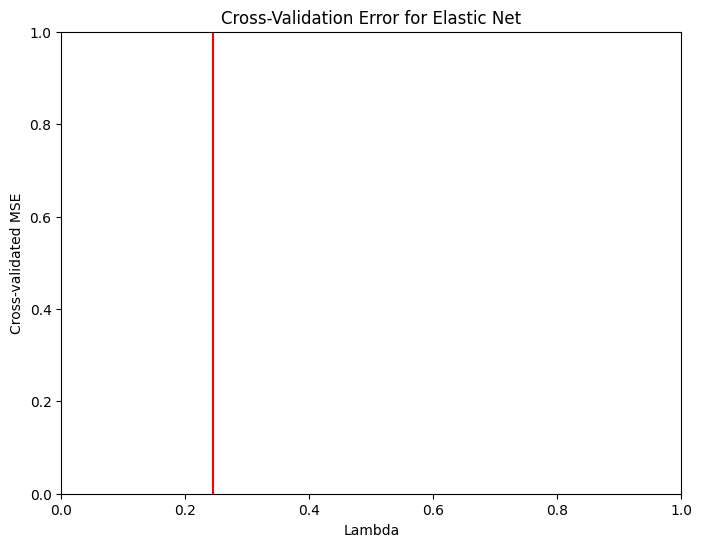

In [ ]:
alpha = 0.5
lambdas = np.logspace(-2, 2, 50)
best_lambda, cv_errors, tested_lambdas = cross_validation_elastic_net(X_scaled, y, alpha=alpha, lambdas=lambdas)

plt.figure(figsize=(8,6))
plt.xlabel('Lambda')
plt.ylabel('Cross-validated MSE')
plt.title('Cross-Validation Error for Elastic Net')
plt.axvline(best_lambda, color='r')

print("Best Lambda:", best_lambda)


In [ ]:
optimal_beta = elastic_net_coordinate_descent(X, y, best_lambda, alpha=alpha)
print("Estimated coefficients with custom Elastic Net:", optimal_beta)


Estimated coefficients with custom Elastic Net: [ 1.08707235e+76 -3.38115265e+79  2.48065435e+82]


<ipython-input-9-402b937f23d6>:11: RuntimeWarning: invalid value encountered in multiply
  r_j = y - X.dot(beta) + X[:, j] * beta[j]
<ipython-input-9-402b937f23d6>:11: RuntimeWarning: invalid value encountered in add
  r_j = y - X.dot(beta) + X[:, j] * beta[j]


In [ ]:
# Note: In sklearn, `alpha` is equivalent to `lambda`, and `l1_ratio` is `alpha` in our code.
en_cv = ElasticNetCV(l1_ratio=alpha, alphas=lambdas, cv=5, fit_intercept=False, random_state=42)
en_cv.fit(X, y)

print("Best Lambda (Sklearn):", en_cv.alpha_)
print("Estimated coefficients (Sklearn):", en_cv.coef_)

# Compare coefficients
coeff_comparison = np.vstack([optimal_beta, en_cv.coef_])
print("Custom vs Sklearn Coefficients:\n", coeff_comparison)


Best Lambda (Sklearn): 0.01
Estimated coefficients (Sklearn): [0.06708071 0.16001549 0.02843369]
Custom vs Sklearn Coefficients:
 [[ 1.08707235e+76 -3.38115265e+79  2.48065435e+82]
 [ 6.70807052e-02  1.60015485e-01  2.84336881e-02]]
